In [1]:
import cv2
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt

In [2]:
label_def = {'axis': 7,
 'background': 14,
 'bearing': 6,
 'bearing_box_ax01/_ax16': 5,
 'container_box_blue': 10,
 'container_box_red': 11,
 'distance_tube': 8,
 'em_01': 12,
 'em_02': 13,
 'f20_20_B/s40_40_B': 0,
 'f20_20_G/s40_40_G': 1,
 'm20/m30': 3,
 'm20_100': 2,
 'motor': 9,
 'r20': 4}

In [3]:
LABEL_PATH = './ground_truth_combined'

cls_to_pixelCount = {key:0 for key in range(len(label_def))}
image_to_cls_to_pixelCount = {}
sets = os.listdir(LABEL_PATH)

file_paths = list()
for s in sets:
    for file in os.listdir(join(LABEL_PATH, s)):
        file_paths.append(join(LABEL_PATH, s, file))
        image_to_cls_to_pixelCount[file] = cls_to_pixelCount.copy()

In [4]:
img_dimension = cv2.imread(file_paths[0], 0).shape

for path in file_paths:
    img = cv2.imread(path, 0)
    clses = np.unique(img)
    img_name = path.split('/')[-1]
    
    for cls in clses:      
        image_to_cls_to_pixelCount[img_name][cls] = np.shape(np.argwhere(img==cls))[0]
    
    if sum(image_to_cls_to_pixelCount[img_name].values()) != img.shape[0]*img.shape[1]:
        raise ValueError('Not all pixels have been counted...')

In [5]:
cls_to_percentage = {key:0 for key in label_def.keys()}

for count_dict in image_to_cls_to_pixelCount.values():
    for key in cls_to_percentage.keys():
        cls_to_percentage[key] += count_dict.get(label_def[key], 0)

total_pixels = img_dimension[0]*img_dimension[1]*len(file_paths)

cls_to_percentage = {key:(value/total_pixels)*100 for key, value in cls_to_percentage.items()}
cls_to_percentage

{'axis': 0.20352265625,
 'background': 92.22109485677083,
 'bearing': 0.15476692708333334,
 'bearing_box_ax01/_ax16': 0.6850776692708334,
 'container_box_blue': 1.2153619791666668,
 'container_box_red': 1.0596972005208334,
 'distance_tube': 0.051159375,
 'em_01': 0.76256796875,
 'em_02': 0.9044536458333333,
 'f20_20_B/s40_40_B': 0.47755911458333333,
 'f20_20_G/s40_40_G': 0.7813235677083333,
 'm20/m30': 0.4405211588541667,
 'm20_100': 0.30695651041666666,
 'motor': 0.4717791666666667,
 'r20': 0.264158203125}

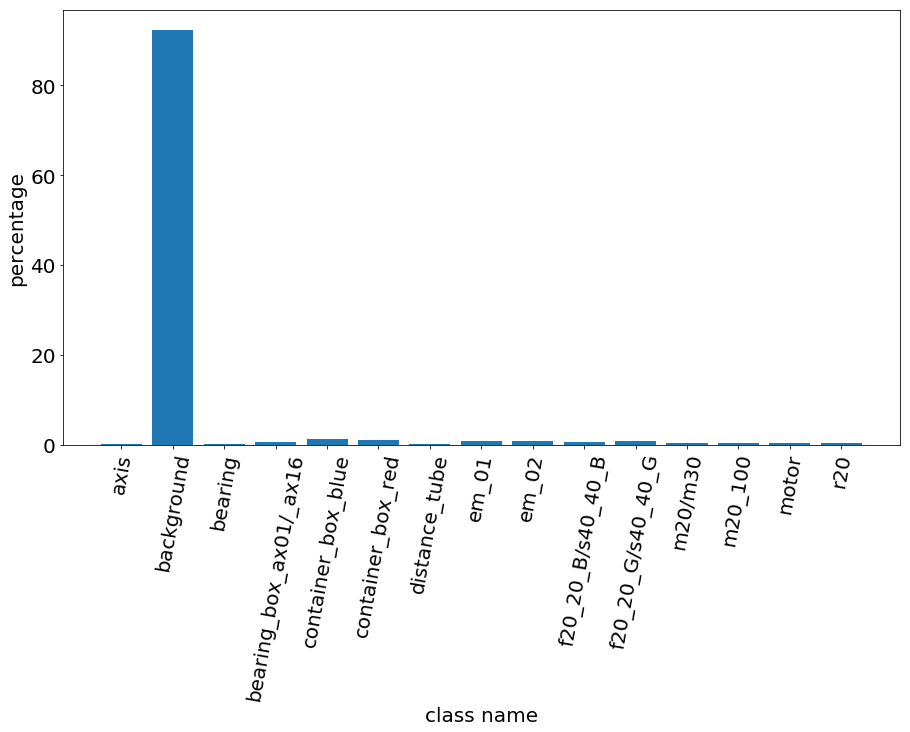

In [6]:
figure = plt.figure(figsize=(15, 8))
plt.bar(cls_to_percentage.keys(), cls_to_percentage.values())
plt.xlabel('class name', fontsize= 20)
plt.ylabel('percentage', fontsize= 20)
plt.xticks(rotation=80)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [7]:
cls_to_weight = {key: round(len(label_def)/(100*value),4) for key, value in cls_to_percentage.items()}
cls_to_weight

{'axis': 0.737,
 'background': 0.0016,
 'bearing': 0.9692,
 'bearing_box_ax01/_ax16': 0.219,
 'container_box_blue': 0.1234,
 'container_box_red': 0.1415,
 'distance_tube': 2.932,
 'em_01': 0.1967,
 'em_02': 0.1658,
 'f20_20_B/s40_40_B': 0.3141,
 'f20_20_G/s40_40_G': 0.192,
 'm20/m30': 0.3405,
 'm20_100': 0.4887,
 'motor': 0.3179,
 'r20': 0.5678}

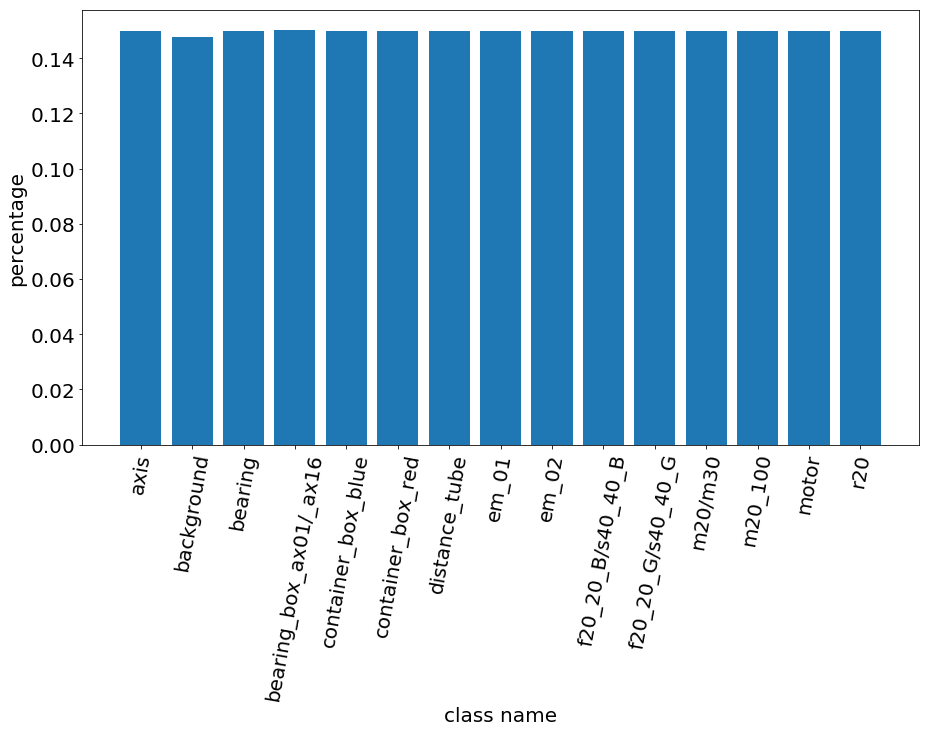

In [8]:
figure = plt.figure(figsize=(15, 8))
plt.bar(cls_to_percentage.keys(), 
        np.array(list(cls_to_percentage.values()))*np.array(list(cls_to_weight.values())))
plt.xlabel('class name', fontsize= 20)
plt.ylabel('percentage', fontsize= 20)
plt.xticks(rotation=80)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [9]:
weight_list = np.zeros(len(label_def))
for label in label_def.keys():
    weight_list[label_def[label]] = cls_to_weight[label]
    
print (list(weight_list))

[0.3141, 0.192, 0.4887, 0.3405, 0.5678, 0.219, 0.9692, 0.737, 2.932, 0.3179, 0.1234, 0.1415, 0.1967, 0.1658, 0.0016]


In [15]:
cls_to_count = {key:0 for key in range(len(label_def))}
for count_dict in image_to_cls_to_pixelCount.values():
    cls_to_count = {key: value + 1 if count_dict[key]!=0 else value for key, value in cls_to_count.items()}

In [16]:
cls_to_count

{0: 1321,
 1: 1442,
 2: 839,
 3: 1375,
 4: 711,
 5: 1331,
 6: 603,
 7: 745,
 8: 498,
 9: 896,
 10: 892,
 11: 785,
 12: 924,
 13: 806,
 14: 5000}

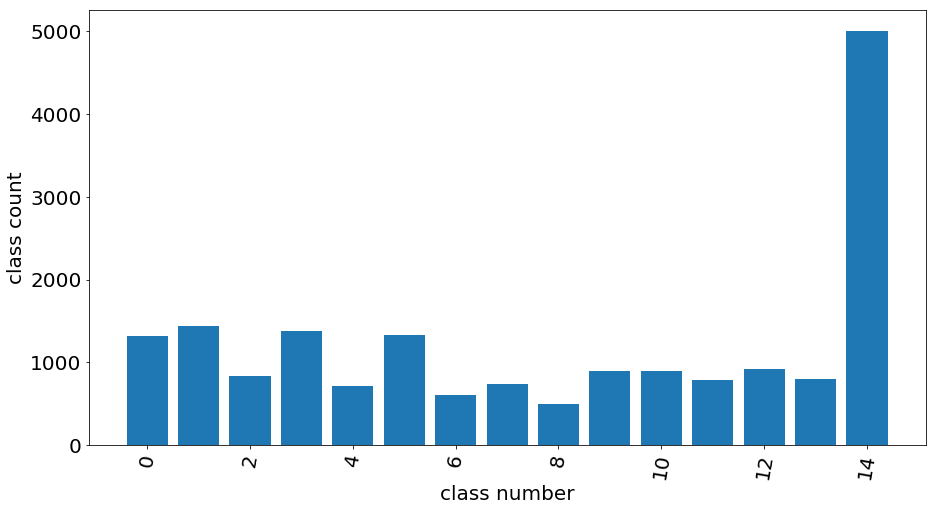

In [17]:
figure = plt.figure(figsize=(15, 8))
plt.bar(cls_to_count.keys(), cls_to_count.values())
plt.xlabel('class number', fontsize= 20)
plt.ylabel('class count', fontsize= 20)
plt.xticks(rotation=80)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()